https://medium.com/mlearning-ai/k-means-clustering-with-scikit-learn-e2af706450e4 --> A different way to do elbow curve   

https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py --> different method to do mini batch kmeans 

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_plusplus.html --> try this??

https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

https://towardsdev.com/outlier-detection-using-k-means-clustering-in-python-214188fc90e8

https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3

things to do:
1. kmeans++ jasmin
2. exploring the random state it kind of helps?? not so sure actually i haven try big numbers samiksha
4. things to put it report the three methods clodia 

we all try find public code?

comparsion metric:
1. timing???
2. how well it cluster???



stuff to discuss:
1. are we using three variables??
2. scaling affects!!!!!

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.cluster import KMeans
from sklearn.cluster import kmeans_plusplus
from sklearn.preprocessing import MinMaxScaler
import time

from mpl_toolkits import mplot3d 
sb.set() # set the default Seaborn style for graphics
pd.options.mode.chained_assignment = None
scaler = MinMaxScaler()

ImportError: cannot import name 'kmeans_plusplus' from 'sklearn.cluster' (C:\Users\samik\Anaconda3\lib\site-packages\sklearn\cluster\__init__.py)

In [ ]:
imported_data = pd.read_csv("../miami_housing.csv") #import fresh data  
imported_data[["LATITUDE", "LONGITUDE"]] = scaler.fit_transform(imported_data[["LATITUDE", "LONGITUDE"]])
imported_data

In [ ]:
miamiData = pd.read_csv("../miami_housing.csv")
data = pd.DataFrame(miamiData[['LATITUDE', 'LONGITUDE']])
distortions = [] # It is calculated as the average of the squared distances from the cluster centers of the respective clusters
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_) # Inertia is the sum of squared distances of samples to their closest cluster center.
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method showing the optimal K')
plt.show()

In [ ]:

def three_Feature_clustering(varname):
   
    dataset = pd.read_csv("../miami_housing.csv") #import fresh data  
    dataset[["LATITUDE", "LONGITUDE", varname]] = scaler.fit_transform(dataset[["LATITUDE", "LONGITUDE", varname]])
    X = dataset[['LATITUDE', 'LONGITUDE', 'PARCELNO', varname]]
    k_means = KMeans(n_clusters=6, init='random', random_state=42) 
    start = time.time()
    X['clusters'] = k_means.fit_predict(X[['LATITUDE', 'LONGITUDE', varname]])
    end = time.time()
    
    print("Time Taken for kmeans: ", end-start)
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
#     plt.figure(figsize=(16, 6))
#     print(centroid)
    
#     sb.scatterplot(data=dataset, x="LONGITUDE", y="LATITUDE", hue="clusters", palette="deep")
#     sb.scatterplot(data = centroid, x=centroid[:, 1], y=centroid[:,0], color = "black")
#     plt.figure(figsize=(8,5))
#     sb.boxplot(x='clusters',y='SALE_PRC',data=dataset, palette='rainbow')
#     string = "Price based on cluster with variable " +str(varname)
#     plt.title(string)
    
    fig = plt.figure(figsize=(16,6))
    xs = dataset[['LATITUDE']].to_numpy()
    ys = dataset[['LONGITUDE']].to_numpy()
    zs = dataset[[varname]].to_numpy()
    cs = dataset[['clusters']].to_numpy()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs,ys,zs, c=cs, cmap='Accent')


Time Taken for kmeans:  0.45522499084472656


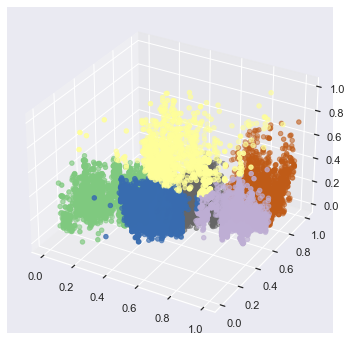

In [9]:
three_Feature_clustering("TOT_LVG_AREA")

In [10]:
def three_Feature_clustering_kmeanspp(varname):
    
    dataset = pd.read_csv("../miami_housing.csv") #import fresh data  
    dataset[["LATITUDE", "LONGITUDE", varname]] = scaler.fit_transform(dataset[["LATITUDE", "LONGITUDE", varname]])
    X = dataset[['LATITUDE', 'LONGITUDE', 'PARCELNO', varname]]
    k_means = KMeans(n_clusters=6, init='k-means++', random_state=42) 
    start = time.time()
    X['clusters'] = k_means.fit_predict(X[['LATITUDE', 'LONGITUDE', varname]])
    end = time.time()
    centers_init, indices = kmeans_plusplus(X, n_clusters=4, random_state=42)
    print(centers_init)
    
    print("Time Taken for kmeans++: ", end-start)
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
#     plt.figure(figsize=(16, 6))
#     sb.scatterplot(data=dataset, x="LONGITUDE", y="LATITUDE", hue="clusters", palette="deep")
#     plt.figure(figsize=(8,5))
#     sb.boxplot(x='clusters',y='SALE_PRC',data=dataset, palette='rainbow')
#     string = "Price based on cluster with variable " +str(varname)
#     plt.title(string)
    
    fig = plt.figure(figsize=(16,6))
    xs = dataset[['LATITUDE']].to_numpy()
    ys = dataset[['LONGITUDE']].to_numpy()
    zs = dataset[[varname]].to_numpy()
    cs = dataset[['clusters']].to_numpy()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs,ys,zs, c=cs, cmap='Accent')

Time Taken for kmeans:  0.3340160846710205


NameError: name 'kmeans_plusplus' is not defined

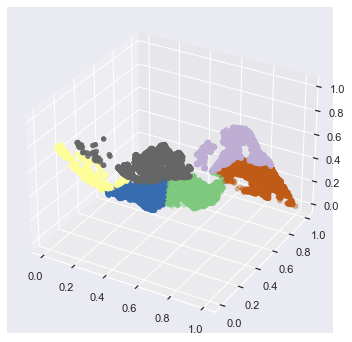

In [11]:
three_Feature_clustering("OCEAN_DIST")
three_Feature_clustering_kmeanspp("OCEAN_DIST")